# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

temp = []
humidity = []
cloudiness = []
wind = []
lat = []
used_cities = []

for city in cities:
        response = requests.get(query_url + city).json()
        try:
            temp.append(response["main"]["temp_max"])
            humidity.append(response["main"]["humidity"])
            cloudiness.append(response["clouds"]["all"])
            wind.append(response["wind"]["speed"])
            lat.append(response["coord"]["lat"])
            used_cities.append(response["name"])
            print(f"Processing {city}")
        except :
            print(f"{city} not found.")

Processing karaj
Processing tuatapere
belushya guba not found.
kemijarvi not found.
temaraia not found.
Processing mataura
Processing busselton
rungata not found.
Processing okha
Processing yellowknife
Processing vayalar
Processing muros
Processing arman
Processing lumeje
Processing upernavik
Processing new norfolk
Processing bela
Processing matara
Processing khatanga
Processing vardo
Processing longyearbyen
Processing nuuk
Processing bredasdorp
halalo not found.
Processing kruisfontein
Processing port alfred
Processing rikitea
Processing butaritari
Processing nikolskoye
Processing ushuaia
Processing xai-xai
marcona not found.
Processing lucea
Processing kovur
Processing sainte-maxime
Processing chicama
Processing jinji
Processing pacific grove
Processing chokurdakh
tukrah not found.
Processing lata
amderma not found.
Processing tuktoyaktuk
Processing ballina
Processing mahebourg
Processing kapaa
Processing vavuniya
safaqis not found.
Processing arraial do cabo
Processing egvekinot
Pro

Processing cardenas
samusu not found.
Processing solwezi
Processing khandyga
Processing huarmey
Processing vila velha
Processing beringovskiy
Processing hammerfest
Processing lookan
Processing lumberton
Processing kapuskasing
Processing chaadayevka
Processing carora
Processing goderich
Processing villacarrillo
Processing moree
Processing nhulunbuy
Processing bolivar
Processing chama
Processing chakrata
Processing saint-paul
Processing nalut
Processing krasnyy oktyabr
Processing gojra
Processing ayagoz
Processing eatonton
Processing kapit
Processing kargasok
Processing malanje
Processing kota kinabalu
hunza not found.
Processing paamiut
Processing kariba
Processing bako
Processing axim
Processing solnechnyy
Processing coari
Processing muroto
Processing kurchum
Processing guerrero negro
Processing mount isa
benha not found.
Processing loreto
Processing grand baie
Processing ulagan
Processing saint-augustin
Processing samarai
Processing provideniya
Processing gweta
Processing salinas
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City": used_cities,
    "Lat": lat,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind": wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Max Temp,Humidity,Cloudiness,Wind
0,Karaj,35.81,44.60,34,0,4.70
1,Tuatapere,-46.13,68.34,60,100,9.42
2,Mataura,-46.19,70.77,59,68,5.17
3,Busselton,-33.64,68.88,96,0,9.64
4,Okha,53.59,9.93,88,80,19.82


In [5]:
weather_data.to_csv("Weather_Data.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

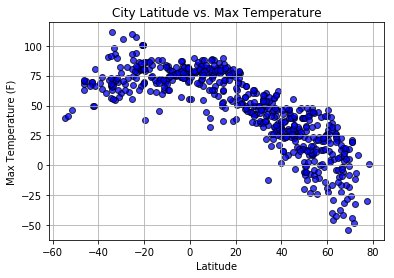

<Figure size 432x288 with 0 Axes>

In [6]:
plt.scatter(lat, temp, marker="o", c='b', alpha=0.75, edgecolors = "black")
plt.grid()
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()
plt.savefig("Temperature.png")

#### Latitude vs. Humidity Plot

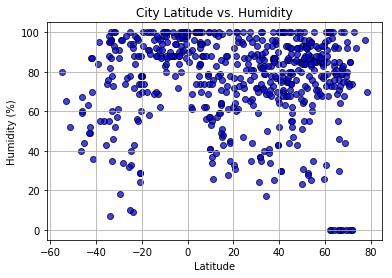

<Figure size 432x288 with 0 Axes>

In [7]:
plt.scatter(lat, humidity, marker="o", c='b', alpha=0.75, edgecolors = "black")
plt.grid()
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()
plt.savefig("Humidity.png")

#### Latitude vs. Cloudiness Plot

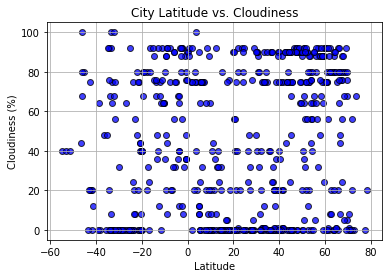

<Figure size 432x288 with 0 Axes>

In [8]:
plt.scatter(lat, cloudiness, marker="o", c='b', alpha=0.75, edgecolors = "black")
plt.grid()
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()
plt.savefig("Cloudiness.png")

#### Latitude vs. Wind Speed Plot

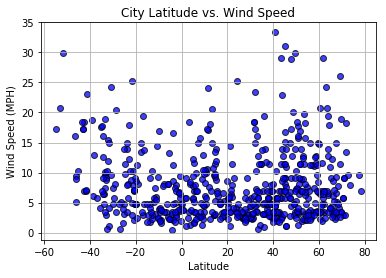

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(lat, wind, marker="o", c='b', alpha=0.75, edgecolors = "black")
plt.grid()
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.show()
plt.savefig("Wind Speed.png")